In [ ]:
# !wget "https://static.stooq.com/db/h/tqobcntmx5id8gas3f61p2kluvwr7j9y/d_us_txt.zip"

In [ ]:
from google.colab import drive

drive.mount("drive")

Mounted at drive


In [ ]:
!cp "/content/drive/MyDrive/Stock Market Prediction Graduation Project/nasdaq_screener.csv" ./nasdaq_screener.csv

In [ ]:
!cp "/content/drive/MyDrive/Stock Market Prediction Graduation Project/news.zip" ./
!unzip news.zip

Archive:  news.zip
  inflating: us_equities_news_dataset.csv  


In [ ]:
!cp "/content/drive/MyDrive/Stock Market Prediction Graduation Project/d_us_txt.zip" ./ 
!unzip  d_us_txt.zip

In [ ]:
import os
import pandas as pd
dfs = []
for i in range(1,4):
  for k in os.listdir(f"/content/data/daily/us/nasdaq stocks/{i}"):
    #symbol	dateOfPrice	open	high	low	close	volume
    dfs.append(pd.read_csv(f"/content/data/daily/us/nasdaq stocks/{i}/{k}", sep=",", header=0, names = ["symbol","<PER>","dateOfPrice","<TIME>","open","high","low","close","volume","<OPENINT>"]))

In [ ]:
all_stocks = pd.concat(dfs)
del dfs

In [ ]:
all_stocks.columns =  ["symbol","<PER>","dateOfPrice","<TIME>","open","high","low","close","volume","<OPENINT>"]

In [ ]:
"""
date was in the format of 
20190101
day is first 2 digits month is the 2nd 2 digits 
"""
import datetime
def to_datetime(x:int):
  day = x%100
  x  = x//100
  month = x%100
  year = x//100
  return datetime.datetime(year,month,day)
all_stocks["dateOfPrice"] = all_stocks["dateOfPrice"].apply(to_datetime)

In [ ]:
all_stocks = all_stocks.sort_values(["dateOfPrice"])

In [ ]:
import gc
gc.collect()

0

In [ ]:
all_stocks

,symbol,<PER>,dateOfPrice,<TIME>,open,high,low,close,volume,<OPENINT>
0,GT.US,D,1970-01-02,0,3.322400,3.429000,3.268700,3.402300,3.626400e+04,0
0,AEP.US,D,1970-01-02,0,1.293500,1.332230,1.293500,1.319260,1.600848e+04,0
0,HON.US,D,1970-01-02,0,0.959318,0.998033,0.959318,0.982567,6.979900e+04,0
1,AEP.US,D,1970-01-05,0,1.319260,1.332230,1.300280,1.332230,2.734646e+04,0
1,HON.US,D,1970-01-05,0,0.990252,1.013700,0.990252,1.013700,1.434757e+05,0
...,...,...,...,...,...,...,...,...,...,...
299,ASTL.US,D,2022-12-29,0,6.110000,6.380000,6.110000,6.350000,1.345646e+06,0
522,POWW.US,D,2022-12-29,0,1.660000,1.730000,1.660000,1.710000,1.284299e+06,0
1105,DMTK.US,D,2022-12-29,0,1.700000,1.820000,1.670000,1.760000,4.710180e+05,0
8218,ZION.US,D,2022-12-29,0,48.060000,49.310000,47.925000,49.080000,6.853490e+05,0


In [ ]:
#Data
import json
#NEE

import spacy
from spacy.lang.en import English
from spacy.pipeline import EntityRuler
import re
from spacy import displacy
from collections import Counter
from typing import List
import en_core_web_sm
import matplotlib.pyplot as plt
#Models
from datetime import timedelta
import torch
import numpy as np 

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# sql_query = """SELECT name FROM sqlite_master  
#   WHERE type='table';"""
# cursor =  con.cursor()

# cursor.execute(sql_query)
# tables = [ x[0]  for x in cursor.fetchall()]

In [ ]:
# tables

In [ ]:
import gdown
trained_ner_url = "https://drive.google.com/drive/folders/1oIsO99-13fbDdYPXtxQwFYvQDy7WsIxx?usp=sharing"
gdown.download_folder(trained_ner_url, quiet=True)
nlp =spacy.load("/content/stocks_trained_ner")

def get_companies(article:str)-> List[str]:
  doc = nlp(article)
  results = []
  for ent in doc.ents:
      results.append(ent.label_)
  return list((set(results)))

In [ ]:


import pandas as pd
dfs = {}
dfs["us_equities_news_dataset"] = pd.read_csv("/content/us_equities_news_dataset.csv")
dfs["us_equities_news_dataset"]["release_date"] = pd.to_datetime(dfs["us_equities_news_dataset"]["release_date"])
dfs["us_equities_news_dataset"].columns = [k if k != "ticker" else "symbol" for k in dfs["us_equities_news_dataset"].columns ]
dfs["stockHistory"] = all_stocks

In [ ]:
dfs["us_equities_news_dataset"]["release_date"].value_counts()

2020-01-30    505
2020-01-28    457
2020-01-29    432
2019-05-01    418
2020-01-22    408
             ... 
2011-07-17      1
2011-06-12      1
2011-06-19      1
2011-05-15      1
2010-03-22      1
Name: release_date, Length: 3641, dtype: int64

In [ ]:
dfs["us_equities_news_dataset"]["release_date"].max() 

Timestamp('2020-02-13 00:00:00')

In [ ]:
dfs["stockHistory"]["dateOfPrice"].min()

Timestamp('1970-01-02 00:00:00')

In [ ]:
dfs["stockHistory"]

,symbol,<PER>,dateOfPrice,<TIME>,open,high,low,close,volume,<OPENINT>
0,GT.US,D,1970-01-02,0,3.322400,3.429000,3.268700,3.402300,36264.000000,0
0,AEP.US,D,1970-01-02,0,1.293500,1.332230,1.293500,1.319260,16008.480426,0
0,HON.US,D,1970-01-02,0,0.959318,0.998033,0.959318,0.982567,69799.004356,0
1,AEP.US,D,1970-01-05,0,1.319260,1.332230,1.300280,1.332230,27346.464307,0
1,HON.US,D,1970-01-05,0,0.990252,1.013700,0.990252,1.013700,143475.674781,0
...,...,...,...,...,...,...,...,...,...,...
417,FSBC.US,D,2022-12-29,0,27.110000,27.410000,26.700000,27.320000,16540.000000,0
372,SNTG.US,D,2022-12-29,0,1.694300,2.080000,1.694300,1.920000,124222.000000,0
495,KBNTW.US,D,2022-12-29,0,0.099500,0.100000,0.060000,0.099500,4720.000000,0
605,FATBP.US,D,2022-12-29,0,14.270000,14.600000,14.260000,14.310000,8982.000000,0


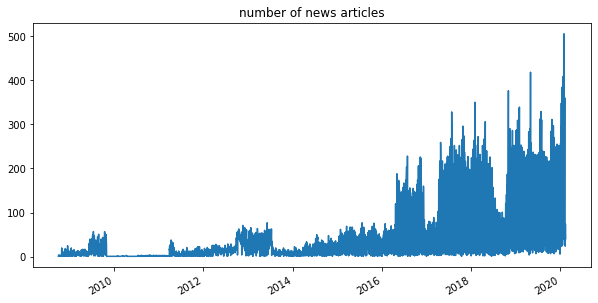

In [ ]:
plt.figure(figsize=(10,5))
dfs["us_equities_news_dataset"]["release_date"].value_counts().sort_index().plot()
# plt.ylabel("number of news articles")
plt.title("number of news articles")
plt.show()

In [ ]:
# we have historical data from 1970 and later
# # we also have news till 2020 
stock_df = dfs["stockHistory"][dfs["stockHistory"]["dateOfPrice"] <= dfs["us_equities_news_dataset"]["release_date"].max()  + timedelta(7)]
stock_df = stock_df[stock_df["dateOfPrice"] >=  datetime.datetime(2015, 1, 1) -timedelta(7) ]
news_df = dfs["us_equities_news_dataset"][dfs["us_equities_news_dataset"]["release_date"] >= datetime.datetime(2015, 1, 1) - timedelta(7)]
news_df.drop(["provider"], axis=1, inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
news_df["symbol"].value_counts() #

AAPL    18776
MSFT     7574
AMZN     6136
BA       5447
BAC      5172
        ...  
BERK        1
CFNB        1
AIRT        1
CART        1
CASS        1
Name: ticker, Length: 796, dtype: int64

In [ ]:
dfs["stockHistory"].symbol.unique()[50:150]

array(['ODP.US', 'GNTX.US', 'AXGN.US', 'XRAY.US', 'BIIB.US', 'QCOM.US',
       'GILD.US', 'SNPS.US', 'BBBY.US', 'SBUX.US', 'PDCO.US', 'IAC.US',
       'MCHP.US', 'INTU.US', 'SANM.US', 'RAVE.US', 'MAR.US', 'PTEN.US',
       'VIAV.US', 'FLEX.US', 'DLTR.US', 'MITK.US', 'DISH.US', 'ADMP.US',
       'HSIC.US', 'NTAP.US', 'TTNP.US', 'CHKP.US', 'LAMR.US', 'AMZN.US',
       'RYAAY.US', 'CHRW.US', 'PRDO.US', 'VRSN.US', 'EBAY.US', 'NVDA.US',
       'FMBH.US', 'MRVL.US', 'XEL.US', 'PFG.US', 'MARK.US', 'APDN.US',
       'ELYS.US', 'BCML.US', 'GOOGL.US', 'RNST.US', 'OPCH.US', 'ELTK.US',
       'MNRO.US', 'FFIN.US', 'RMCF.US', 'CFFN.US', 'IRIX.US', 'LTRX.US',
       'EZPW.US', 'MNDO.US', 'MGI.US', 'RBBN.US', 'CPHC.US', 'UFPT.US',
       'CHNR.US', 'CHY.US', 'LPTH.US', 'ACGL.US', 'CTSH.US', 'SYPR.US',
       'CBAT.US', 'STRR.US', 'NKSH.US', 'ASRV.US', 'RGCO.US', 'WULF.US',
       'CNXN.US', 'CATY.US', 'WERN.US', 'CEVA.US', 'CHCI.US', 'DXYN.US',
       'KFRC.US', 'DGII.US', 'HCSG.US', 'CTIB.US', 'RVSB

In [ ]:
stock_df["symbol"] = stock_df["symbol"].apply(lambda x: x[:-3] if ".us" in x.lower() else  x) 
stock_history_symbols = stock_df.symbol.unique()
news_symbols = news_df.symbol.unique()
target_symbols = [ k for k in news_symbols if k in stock_history_symbols]
len(target_symbols) , len(news_symbols), len(stock_history_symbols)

(325, 796, 2516)

In [ ]:
import gc 
gc.collect()

In [ ]:
stock_df[~stock_df.symbol.isin(news_df.ticker.unique())]["symbol"].unique()

array(['EXLS', 'MORN', 'OPBK', ..., 'DCOMP', 'RILYM', 'AGNCP'],
      dtype=object)

In [ ]:
#dropping companies that are not in stock_df or not in news_df
news_df = news_df[news_df["symbol"].isin(target_symbols)]
stock_df = stock_df[stock_df["symbol"].isin(target_symbols)]

In [ ]:
news_df["ticker"].value_counts()

AAPL     18776
MSFT      7574
AMZN      6136
GOOGL     4852
TSLA      4097
         ...  
CIZN         1
BELFA        1
DMLP         1
ATLO         1
CZNC         1
Name: ticker, Length: 325, dtype: int64

In [ ]:
news_df.dropna(subset=["content","title","category","release_date", "symbol"]).shape

(82328, 8)

In [ ]:
news_df = news_df.dropna(subset=["content","title","category","release_date", "symbol"])
#generating a column with mentioned companies in each article
news_df["mentioned_companies"] = news_df.apply(lambda x:[ org for org in get_companies(x["content"]) if (org.strip() !=  x["symbol"] and  org.strip() in target_symbols)], axis= 1 )
# news_df = news_df.reset_index(drop=True)
news_df


,id,symbol,title,category,content,release_date,url,article_id,mentioned_companies
0,222817,INTC,Intel INTC To Post Q4 Earnings DCG CCG In...,opinion,Intel NASDAQ INTC is scheduled to report f...,2020-01-20,https://www.investing.com/analysis/intel-intc-...,200500288,"[MSFT, NWS, DAIO, AAPL, BIDU, GOOGL]"
1,222818,INTC,Stocks Jump About 2 This Week On Trade Deals ...,opinion,The major indices just finished another positi...,2020-01-20,https://www.investing.com/analysis/stocks-jump...,200500165,"[CAAS, NFLX]"
2,222819,INTC,Apple Partner Pegatron Plans New Facilities In...,opinion,Apple s NASDAQ AAPL assembly partner Pega...,2020-01-20,https://www.investing.com/analysis/apple-partn...,200500270,"[CAAS, NWSA, QCOM, AAPL]"
3,222820,MSFT,Microsoft exposed 250M customer support records,news,Microsoft MSFT 0 1 discloses a database er...,2020-01-23,https://invst.ly/pli4a,2065317,[]
4,222821,MU,Wall Street dips as investors focus on Middle ...,news,By Caroline Valetkevitch NEW YORK Reuters ...,2020-01-07,https://www.investing.com/news/stock-market-ne...,2053896,"[NDAQ, MCHP, COWN, APA]"
...,...,...,...,...,...,...,...,...,...
82323,442682,AMD,4 Stocks To Watch Today ATW CWEI MXL SLCA,opinion,It was a pretty good start to the week on Mond...,2016-05-17,"https://www.investing.com/analysis/atw,-cwei,-...",200130262,"[DJCO, CPLP, NVDA]"
82324,442683,AMD,4 Stocks To Watch NTRA OLED SLCA SUPN,opinion,It was a disappointing day on Wall Street on M...,2016-05-24,"https://www.investing.com/analysis/ntra,-oled,...",200131707,[DJCO]
82325,442697,AMD,Tuesday s Pre Market Insights AMD BBRY LULU,opinion,Advanced Micro Devices Inc NASDAQ AMD shares...,2015-06-09,https://www.investing.com/analysis/tuesday-mor...,254476,[]
82326,442698,AMD,AMD Here s Why It s Climbing,opinion,AMD Unveils The Wraith Cooled A10 7890K APU\nA...,2016-03-02,https://www.investing.com/analysis/advanced-mi...,200120177,[NWSA]


In [ ]:
news_df.to_csv("/content/drive/MyDrive/Stock Market Prediction Graduation Project/processed_news_df.csv")
stock_df.to_csv("/content/drive/MyDrive/Stock Market Prediction Graduation Project/processed_stock_df.csv")

## load processed data 

In [ ]:
import pandas as pd 
nasdaq_screener = pd.read_csv("/content/drive/MyDrive/Stock Market Prediction Graduation Project/nasdaq_screener.csv")
news_df = pd.read_csv("/content/drive/MyDrive/Stock Market Prediction Graduation Project/processed_news_df.csv")
news_df["mentioned_companies"] = news_df["mentioned_companies"].apply(lambda x: x[1:-1].replace("'","").replace(" ", "").split(","))
stock_df = pd.read_csv("/content/drive/MyDrive/Stock Market Prediction Graduation Project/processed_stock_df.csv")

In [ ]:
import numpy as np 
#dict of a stock history df for each company  
company_stocks = {}
for symbol, data in stock_df.groupby('symbol')[stock_df.columns]: #groupby company
  # checks every close of the day if it's higher that the close in the day before and creates a binary array
  # data["out"] is the target
  data["target"] = np.where(data["close"] - data["close"].shift(1).fillna(0)> 0, 1, 0 ) 
  data.index = pd.to_datetime(data.dateOfPrice) # setting the index as the dateOfPrice for faster look ups when creating target output for each week_graph
  company_stocks[symbol] = data
  

In [ ]:
from transformers import AutoTokenizer, AutoModel
from typing import List
import torch
from tqdm import tqdm
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

model =  AutoModel.from_pretrained("ProsusAI/finbert")

model.eval()

if torch.cuda.is_available():
  model = model.to("cuda")

device = next(model.parameters()).device 

text =["this is a test"] * 10  

def get_article_vectors(text:List[str], batch_size=32)-> torch.Tensor:
  all_vectors = []
  with torch.no_grad():
    for i in tqdm(range(0,len(text),batch_size)):
      # tokenizer is used to convert news strings into token_ids(used )
      text_tokens = tokenizer(text[i:i+batch_size],padding=True, truncation= True, max_length=300, return_tensors='pt')
      for k,v in text_tokens.items():
        text_tokens[k] = v.to(device)

      out = model(**text_tokens)
      batch_vectors = out.last_hidden_state[:,0].cpu().detach() # first token [CLS] is used for the classification head therefore it can be used to represent the article
      all_vectors.append(batch_vectors)


  all_vectors = torch.cat(all_vectors, axis=0 )
  return all_vectors

out = get_article_vectors(text)
out.shape

Some weights of the model checkpoint at ProsusAI/finbert were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 1/1 [00:03<00:00,  3.46s/it]


torch.Size([10, 768])

In [ ]:
news_vectors =get_article_vectors(news_df["content"].to_list(), batch_size=64)

100%|██████████| 1287/1287 [29:59<00:00,  1.40s/it]


In [ ]:
import torch
# torch.save(news_vectors, "/content/drive/MyDrive/Stock Market Prediction Graduation Project/news_vectors.pt")
news_vectors = torch.load("/content/drive/MyDrive/Stock Market Prediction Graduation Project/news_vectors.pt")

In [ ]:
nasdaq_screener["Sector"].unique()

array(['Industrials', 'Finance', 'Consumer Discretionary', 'Health Care',
       'Real Estate', nan, 'Technology', 'Energy', 'Consumer Staples',
       'Miscellaneous', 'Utilities', 'Telecommunications',
       'Basic Materials'], dtype=object)

In [ ]:
# edge_types 
# article - main_company - company
# article - mentioned - company
# article - in_industry - industry
# company - in_industry - industry

from torch_geometric.data import HeteroData
from datetime import timedelta
import numpy as np
from tqdm import tqdm

lag = 14
stock_days = lag - lag// 7 * 2 # saturday and friday for each week

news_df["release_date"] = pd.to_datetime(news_df["release_date"])
company_to_industry = nasdaq_screener.groupby("Symbol")["Sector"].agg(lambda x: list(x)[0]) # agg list(x)[0] as x is just a list of repeated sectors and we need 1 sector for each company
company_to_industry["ABMD"] = "Health Care"
industry_to_index = {k : v for v,k in enumerate(nasdaq_screener["Sector"].unique()) }
company_to_index = {k :v for v,k in zip(range(news_df["symbol"].nunique()), news_df["symbol"].unique()) }
index_to_company = {v:k for k,v in company_to_index.items()} #reverse 
week_graphs = []  
for day in pd.to_datetime(pd.Series(stock_df["dateOfPrice"].unique()[lag:])):
  start = day - timedelta(lag)
  print(day,  start)
  
  target_news = news_df[(news_df["release_date"]>= start) & (news_df["release_date"] < day) ].copy()
  week_graph = HeteroData()
  edges = {}
  # creating edge_index
  edges["article-main_company-company"] = [[],[]]
  edges["article-mentioned-company"] = [[],[]]
  edges["article-in_industry-industry"] = [[],[]]
  edges["company-mentioned_in-article"] = [[],[]]
  edges["company-in_industry-industry"] = [[],[]]
  edges["industry-has_company-company"] = [[],[]]
  for company in company_to_index.keys():
    edges["company-in_industry-industry"][0].append(company_to_index[company])
    edges["company-in_industry-industry"][1].append(industry_to_index[company_to_industry[company]])
    edges["industry-has_company-company"][0].append(industry_to_index[company_to_industry[company]])
    edges["industry-has_company-company"][1].append(company_to_index[company])
  # creating an array that says stock price info(gone up or down) exists for that day and company or not 
  # if info doesn't exist we won't consider the predictions for that day and company
  info_exists = [ day in  company_stocks[index_to_company[i]].index for i in range(news_df["symbol"].nunique() )] 

  y = [ company_stocks[index_to_company[i]].loc[day]["target"] if info_exists[i] else 0  for i in range(news_df["symbol"].nunique()) ]
  
  company_timeseries =[ company_stocks[index_to_company[i]].loc[start:day-timedelta(1)][["open", "high", "low", "close", "volume"]].to_numpy()  for i in range(news_df["symbol"].nunique()) ] 
  # break
  missing_prices =[ False if x.shape[0] == stock_days else True  for x in company_timeseries  ]
  # break
  company_timeseries =[ x if len(x) == stock_days else np.concatenate([x, np.nan_to_num(x.mean(axis=0).reshape(1,-1), nan=0)+np.zeros((int(stock_days-len(x)), x.shape[1]))])   for x in company_timeseries]
  company_timeseries = np.concatenate([np.expand_dims(x, 0) for x in company_timeseries])
  # # creating gaph edge_index
  for i, (_, r) in enumerate(target_news.iterrows()):
    edges["article-main_company-company"][0].append(i)
    edges["article-main_company-company"][1].append(company_to_index[r["symbol"]])
    for comp in r["mentioned_companies"]:
      if comp not in company_to_index.keys(): continue
      edges["article-mentioned-company"][0].append(i)
      edges["article-mentioned-company"][1].append(company_to_index[comp])
      edges["company-mentioned_in-article"][1].append(i)
      edges["company-mentioned_in-article"][0].append(company_to_index[comp])
    edges["article-in_industry-industry"][0].append(i)
    edges["article-in_industry-industry"][1].append(industry_to_index[company_to_industry[r["symbol"]]])
  for k, v in edges.items():
    edge_name = k.split("-")
    week_graph[edge_name[0],edge_name[1],edge_name[2]].edge_index  = torch.tensor(v)
    
  week_graph["target"] = torch.as_tensor(y)
  week_graph["missing_prices"] = torch.as_tensor(missing_prices)
  week_graph["info_exists"] = torch.as_tensor(info_exists) 
  week_graph["company_timeseries"] =torch.from_numpy(company_timeseries)
  week_graph["company"].x = torch.as_tensor(range(len(index_to_company.keys()))) # just the ids to be passed to the embedding layer
  week_graph["article"].x =  news_vectors[target_news.index]  # get_article_vectors(target_news["content"].to_list()) # Nx768 (number of articles X the embedding dim of finbert)
  week_graph["industry"].x = torch.as_tensor(range(len(industry_to_index.values())))
  week_graph["date"] = day
  week_graphs.append(week_graph)
  

# 25 24 23 22 21 20

In [ ]:
week_graphs[-1]

HeteroData(
  target=[325],
  missing_prices=[325],
  info_exists=[325],
  company_timeseries=[325, 10, 5],
  date=2020-02-20 00:00:00,
  company={ x=[325] },
  article={ x=[213, 768] },
  industry={ x=[13] },
  (article, main_company, company)={ edge_index=[2, 213] },
  (article, mentioned, company)={ edge_index=[2, 458] },
  (article, in_industry, industry)={ edge_index=[2, 213] },
  (company, mentioned_in, article)={ edge_index=[2, 458] },
  (company, in_industry, industry)={ edge_index=[2, 325] },
  (industry, has_company, company)={ edge_index=[2, 325] }
)

In [ ]:
import torch
"""
https://pytorch-geometric.readthedocs.io/en/latest/tutorial/create_dataset.html
"""
from torch_geometric.data  import InMemoryDataset
class WeekGraphs(InMemoryDataset):
    def __init__(self, root, data_list, transform=None):
        self.data_list = data_list
        super().__init__(root, transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def processed_file_names(self):
        return 'data.pt'

    def process(self):
        torch.save(self.collate(self.data_list), self.processed_paths[0])
dataset = WeekGraphs("/content/drive/MyDrive/Stock Market Prediction Graduation Project/graph_dataset", [])

In [ ]:
range(int(len(dataset) * 0.8)), range(int(len(dataset) * 0.8), len(dataset))

In [ ]:
WeekGraphs("/content/drive/MyDrive/Stock Market Prediction Graduation Project/graph_trainset", [dataset[i] for i in range(int(len(dataset) * 0.8))])
WeekGraphs("/content/drive/MyDrive/Stock Market Prediction Graduation Project/graph_testset", [dataset[i] for i in range(int(len(dataset) * 0.8), len(dataset))])

Processing...
Done!
Processing...
Done!


WeekGraphs(257)

In [ ]:
len(dataset)

1282

In [ ]:
test.data75

HeteroData(
  target=[408200],
  missing_prices=[408200],
  info_exists=[408200],
  company_timeseries=[408200, 10, 5],
  date=[1256],
  company={ x=[408200] },
  article={ x=[789127, 768] },
  industry={ x=[16328] },
  (article, main_company, company)={ edge_index=[2, 789127] },
  (article, mentioned, company)={ edge_index=[2, 1403092] },
  (article, in_industry, industry)={ edge_index=[2, 789127] },
  (company, mentioned_in, article)={ edge_index=[2, 1403092] }
)

In [ ]:
test[0]

HeteroData(
  target=[325],
  missing_prices=[325],
  info_exists=[325],
  company_timeseries=[325, 10, 5],
  date=2015-02-25 00:00:00,
  company={ x=[325] },
  article={ x=[205, 768] },
  industry={ x=[13] },
  (article, main_company, company)={ edge_index=[2, 205] },
  (article, mentioned, company)={ edge_index=[2, 301] },
  (article, in_industry, industry)={ edge_index=[2, 205] },
  (company, mentioned_in, article)={ edge_index=[2, 301] }
)

In [ ]:
# HeteroData( 
#   target=[325], price movement 0 or 1 on the target 
#   info_exists=[325],  0 or 1 whether we have information about the price movement on the target day 
#   company_timeseries=[325, 6, 5], tensor of shape (n_companies, 6 days, 5 features(low, high, open, close, volume) ) that will be input for lstm part of the model
#   company={ x=[325] }, just a range(325) which wil be used to index the company embedding layer 
#   article={ x=[N, 768] }, article vectors for that week  
#   industry={ x=[12] }, a range(12) which will be used to index the industries embedding layer 
#   (article, main_company, company)={ edge_index=[2, n_articles] },
#   (article, mentioned, company)={ edge_index=[2, n] },
#   (article, in_industry, industry)={ edge_index=[2, n_articles] },
#   (company, mentioned_in, article)={ edge_index=[2, n_articles] }
# )

# week_graphs[4]

HeteroData(
  target=[325],
  missing_prices=[325],
  info_exists=[325],
  company_timeseries=[325, 10, 5],
  company={ x=[325] },
  article={ x=[47, 768] },
  industry={ x=[12] },
  (article, main_company, company)={ edge_index=[2, 47] },
  (article, mentioned, company)={ edge_index=[2, 75] },
  (article, in_industry, industry)={ edge_index=[2, 47] },
  (company, mentioned_in, article)={ edge_index=[2, 75] }
)